<a href="https://colab.research.google.com/github/somyakmukherjee/Exploratory-Data-Analysis-on-Global-Terrorism/blob/main/Capstone_Project_Team_Notebook_of_Exploratory_Data_Analysis_on_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Expolatory Data Analysis on Global Terrorism Database**



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1**   - Abhijeeth Vhavle
##### **Team Member 2**   - Danish Zia
##### **Team Member 3**   - Somyak Mukherjee

# **Project Summary -**

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

The EDA project on global terrorism aims to delve into comprehensive analysis and visualization of terrorism-related data from around the world. Terrorism continues to be a major global concern, and understanding its patterns, trends, and underlying factors is crucial for formulating effective counterterrorism strategies.

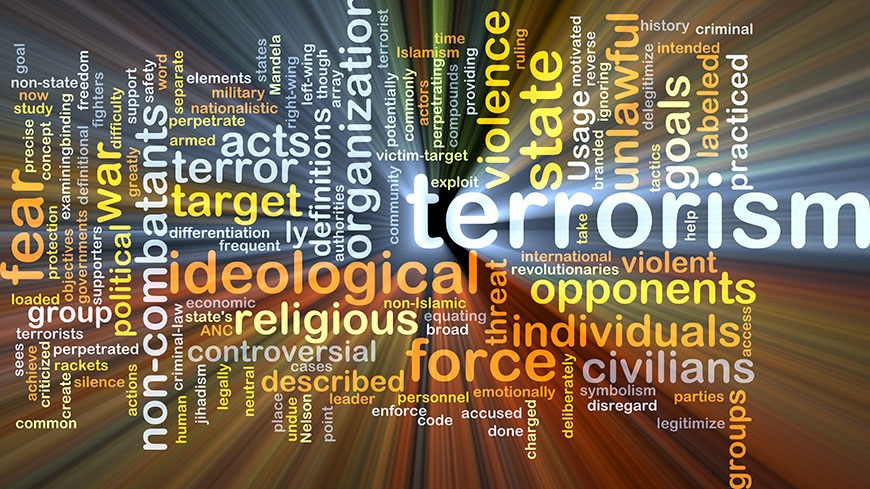

# **GitHub Link -**

Abhijeeth Vhavle- https://github.com/Abhijeethvs/EDA-on-Global-Terrorism/tree/main

Danish Zia- https://github.com/dacenish/EDA-Global-terrorism

Somyak Mukherjee- https://github.com/somyakmukherjee/Exploratory-Data-Analysis-on-Global-Terrorism/tree/main

# **Problem Statement**


**Definition of terrorism:**

**"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."**

**Data Cleaning and Preparation:** The dataset will undergo a thorough cleaning process, ensuring data integrity, handling missing values, and standardizing variables for consistent analysis. Relevant features will be selected, and any redundant or irrelevant data will be removed.

**Descriptive Analysis**: Exploratory statistical analysis techniques will be employed to summarize and describe the data. This analysis will provide an overview of global terrorism trends over time, identifying countries and regions with the highest number of incidents, and exploring the distribution of attack types, targets, and casualties.

**Temporal and Spatial Analysis:** The project will investigate the temporal patterns of terrorist activities, aiming to identify any recurring trends, seasonal variations, or specific time periods associated with increased or decreased incidents. Additionally, spatial analysis techniques will be utilized to visualize terrorism hotspots across different regions and identify areas of high risk.

**Group Analysis:** The project will explore various aspects related to terrorist groups involved in these incidents. This will include analyzing the affiliations, ideologies, and characteristics of different terrorist organizations, examining their influence on attack patterns and understanding the evolution of these groups over time.

**Correlation and Feature Analysis:** The project will explore potential correlations between terrorism incidents and socioeconomic indicators, such as GDP, population density, education levels, and political instability. This analysis aims to identify any underlying factors or indicators that may contribute to the occurrence of terrorist activities.

**Visualization:** Throughout the project, data visualization techniques, including charts, graphs, maps, and interactive dashboards, will be employed to present the findings effectively. These visualizations will aid in conveying complex information in a clear and concise manner.

**Collaborative Platform:** GitHub will serve as a collaborative platform for individuals passionate about combating terrorism. It will encourage discussions, sharing of ideas, and collaborative analysis, fostering a vibrant community of researchers, analysts, and experts working together to enhance our understanding of global terrorism.

#### **Define Your Business Objective?**

Answer Here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import math
from wordcloud import WordCloud
from google.colab import drive

### Dataset Loading

In [3]:
# Mount drive
drive.mount('/content/drive')

# Retrieve data from csv file
filepath = '/content/drive/MyDrive/Global_Terrorism_Data.csv'
globa_terr_data = pd.read_csv(filepath, low_memory=False)

# Create dataframe
gt_df = pd.DataFrame(globa_terr_data)

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
gt_df.shape

(181691, 135)

### Dataset Information

In [6]:
# Dataset Info
gt_df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       1.970000e+11   1970       7     2        NaN         0        NaN   
1       1.970000e+11   1970       0     0        NaN         0        NaN   
2       1.970010e+11   1970       1     0        NaN         0        NaN   
3       1.970010e+11   1970       1     0        NaN         0        NaN   
4       1.970010e+11   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  2.017120e+11   2017      12    31        NaN         0        NaN   
181687  2.017120e+11   2017      12    31        NaN         0        NaN   
181688  2.017120e+11   2017      12    31        NaN         0        NaN   
181689  2.017120e+11   2017      12    31        NaN         0        NaN   
181690  2.017120e+11   2017      12    31        NaN         0        NaN   

        country         country_txt  region

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
gt_df.duplicated().sum()

4550

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
gt_df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
#To get the percentage of null values each column wise
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df)
missingvalues_percentage

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
suicide             0.000000
success             0.000000
crit3               0.000000
property            0.000000
eventid             0.000000
Length: 135, dtype: float64

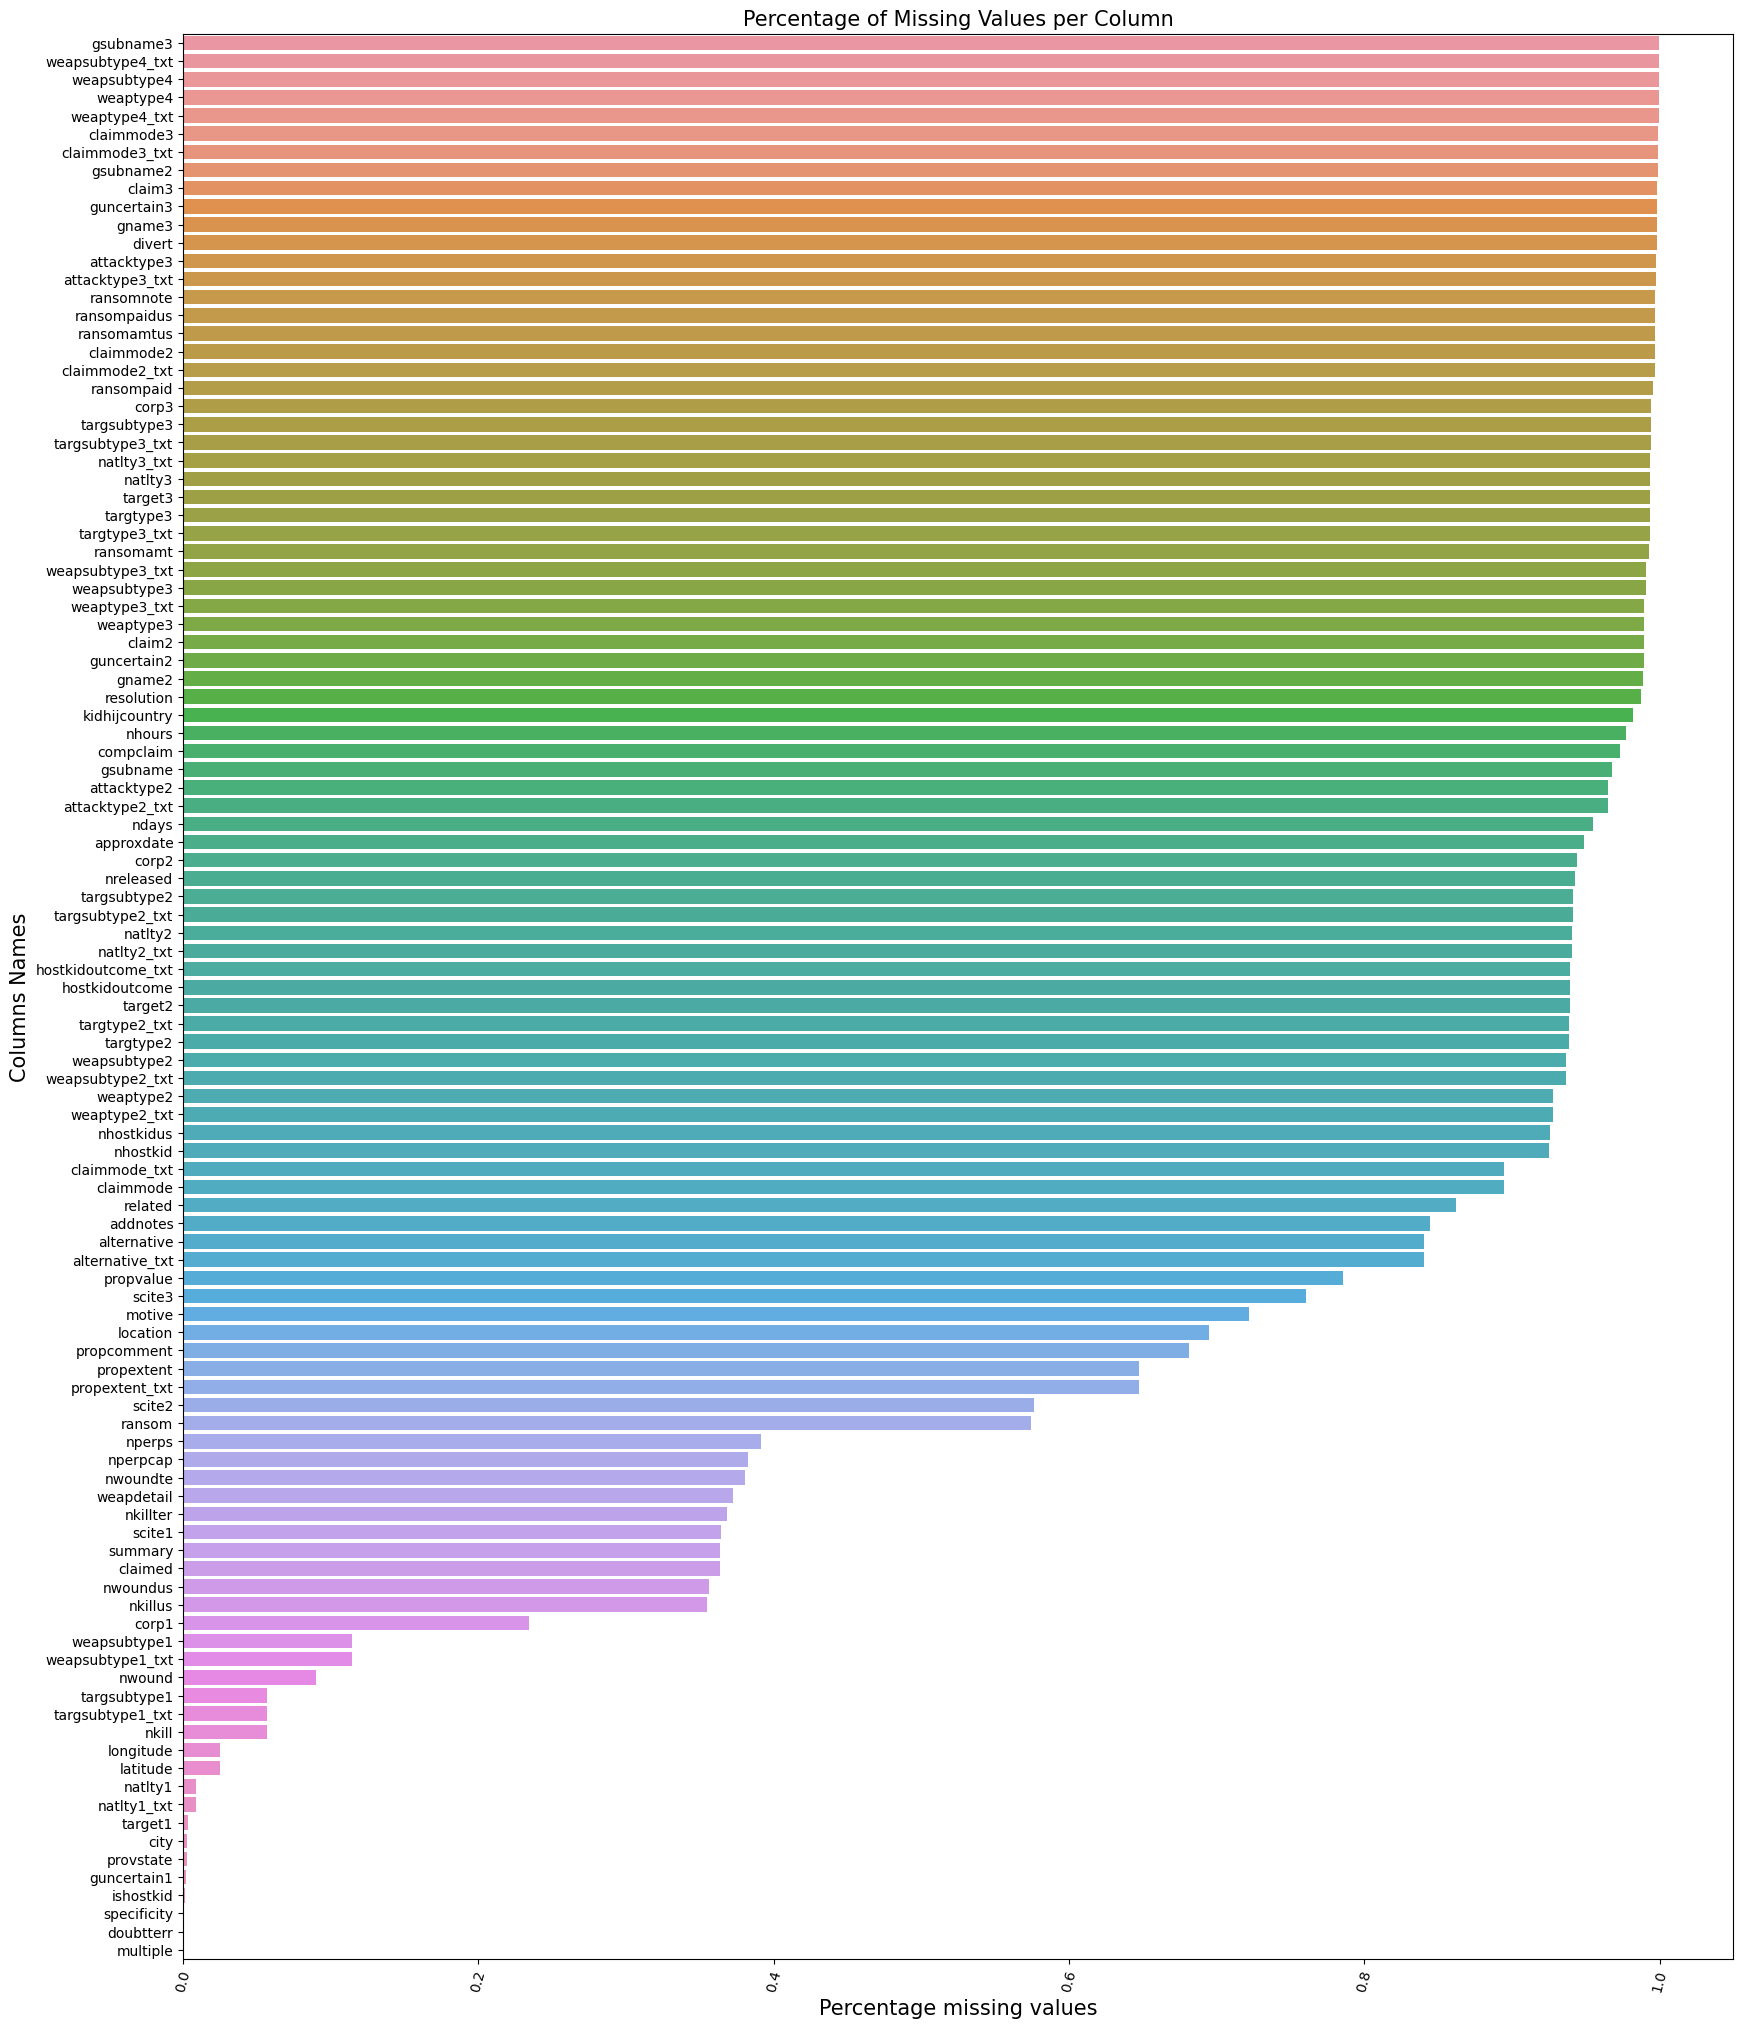

In [10]:
# Visualizing the missing values
plt.figure(figsize=(20,25))
plt.xticks(rotation=75)
plt.yticks(fontsize=10)
plt.title("Percentage of Missing Values per Column",fontsize=15)

b=sns.barplot(x=missingvalues_percentage[missingvalues_percentage>0.0],y=missingvalues_percentage[missingvalues_percentage>0.0].index)
b.set_ylabel("Columns Names",fontsize= 15)
b.set_xlabel("Percentage missing values",fontsize= 15)
plt.show()

### What did you know about your dataset?



About dataset:

Size: (181691, 135)

Geography: Worldwide

Time period: 1970-2017

## ***2. Understanding Your Variables***



In [ ]:
# Dataset Columns
list(gt_df.columns)

In [ ]:
# Dataset Describe
gt_df.describe()

### Variables Description 

Variables: More than 100 variables on location, tactics, perpetrators, targets, and outcomes.
Important columns:

1. Date (Year, Month, Day) --> The date of the attack.

2. Latitude/Longitude --> latitude and longitude of where the attack happened.

3. Country --> The country where the attack happened.

4. Region --> The geographical region (≠ continent) where the attack happened.

5. Target --> The group, the target that was attacked.

6. Killed --> Number of victims of the attack.

7. Weapon_type --> Weapon used for the attack.

8. Attack --> The types of attacks performed.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

## **Data Cleaning & Data Manipulation & Handling Missing Values :**

In [11]:
# Finding the columns that have more than 15% missing values
drop_columns_list = list(missingvalues_percentage[missingvalues_percentage>0.15].index.values)
drop_columns_list

['gsubname3',
 'weapsubtype4_txt',
 'weapsubtype4',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3_txt',
 'natlty3',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3_txt',
 'weapsubtype3',
 'weaptype3_txt',
 'weaptype3',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome_txt',
 'hostkidoutcome',
 'target2',
 'targtype2_txt',
 'targtype2',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode_txt',
 'claimmode',
 'rela

In [12]:
# Dropping the Missing value columns from the data set
gt_df.drop(drop_columns_list,inplace=True,axis=1)
gt_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [13]:
gt_df.shape

(181691, 47)

In [14]:
# Exploring the remaining columns data for missing values
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df) #To get the percentage of null values each column wise
missingvalues_percentage

weapsubtype1        0.114304
weapsubtype1_txt    0.114304
nwound              0.089773
targsubtype1_txt    0.057091
targsubtype1        0.057091
nkill               0.056761
longitude           0.025081
latitude            0.025076
natlty1             0.008581
natlty1_txt         0.008581
target1             0.003500
city                0.002389
provstate           0.002317
guncertain1         0.002091
ishostkid           0.000980
specificity         0.000033
doubtterr           0.000006
multiple            0.000006
individual          0.000000
INT_MISC            0.000000
gname               0.000000
weaptype1_txt       0.000000
weaptype1           0.000000
property            0.000000
INT_IDEO            0.000000
INT_LOG             0.000000
dbsource            0.000000
eventid             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
targtype1           0.000000
imonth              0.000000
iday                0.000000
extended            0.000000
country       

We will analyse following set of columns for our analysis:

Year, Month, Country, Region, State, City, ishostkid, Successs, Nationality of victim, Attack type, Target type, Weapon type, Kills, nwound, Gang name.

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
gt_df.drop(columns={'eventid','extended','iday','country','targsubtype1','region','weaptype1','weapsubtype1','specificity',
                             'vicinity','crit1','crit2','crit3','doubtterr','multiple','suicide','attacktype1','targtype1','targsubtype1_txt'
                             ,'target1','natlty1','guncertain1','individual','weapsubtype1_txt','property','dbsource','INT_LOG','INT_IDEO',
                             'INT_MISC','INT_ANY'},inplace=True,axis=1)

In [16]:
gt_df.rename(columns={'iyear':'Year','imonth':'Month','country_txt':'Country','region_txt':'Region',
                     'provstate':'State','city':'City','latitude':'latitude','longitude':'longitude','success':'Success',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Target_type','targsubtype1_txt':'Target_subtype','natlty1_txt':'Nationality',
                     'gname':'Gang_name','weaptype1_txt':'Weapontype','nkill':'Kills', 'nwound':'Wounds','ishostkid': 'Kid_hostage'},inplace=True)

In [17]:
gt_df.columns

Index(['Year', 'Month', 'Country', 'Region', 'State', 'City', 'latitude',
       'longitude', 'Success', 'Attacktype', 'Target_type', 'Nationality',
       'Gang_name', 'Weapontype', 'Kills', 'Wounds', 'Kid_hostage'],
      dtype='object')

In [18]:
gt_df['State']= gt_df['State'].fillna('Unknown')
gt_df['City']=gt_df['City'].fillna('Unknown')
gt_df['Target_type']= gt_df['Target_type'].fillna("Others")
gt_df['Nationality']=gt_df['Nationality'].fillna('Unknown')
gt_df['Kills']=gt_df['Kills'].fillna(0)
gt_df['Wounds']=gt_df['Wounds'].fillna(0)
gt_df['victims']=gt_df['Kills']+gt_df['Wounds']

In [19]:
gt_df.head()

,Year,Month,Country,Region,State,City,latitude,longitude,Success,Attacktype,Target_type,Nationality,Gang_name,Weapontype,Kills,Wounds,Kid_hostage,victims
0,1970,7,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0,1.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,0.0,1.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,0.0,0.0,0.0,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,0.0,0.0,0.0,0.0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **General Analysis**

In [20]:
print("Country with most attacks: ",gt_df["Country"].value_counts().idxmax())
print("City with most attacks: ",gt_df["City"].value_counts().index[1])
print("Region with most attacks: ",gt_df["Region"].value_counts().idxmax())
print("Year with most attacks: ",gt_df["Year"].value_counts().idxmax())
print("Month with most attacks: ",gt_df["Month"].value_counts().idxmax())
print("Group with most attacks: ",gt_df["Gang_name"].value_counts().index[1])
print("Most Attack Types: ",gt_df["Attacktype"].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with most attacks:  Middle East & North Africa
Year with most attacks:  2014
Month with most attacks:  5
Group with most attacks:  Taliban
Most Attack Types:  Bombing/Explosion


## **Chart - 1 TERROR TREND ANALYSIS**

### **1.1 Analysis of countries most affected by terrorist attacks in the world from 1970 - 2017**

In [21]:
# Code - 
grp = gt_df.groupby('Country')
tot_ser = grp['Success'].sum()
tot_attack = pd.DataFrame(tot_ser).reset_index()
tot_attack.sort_values(by = 'Success',ascending = False, inplace = True)
tot_attack = tot_attack.head(30)

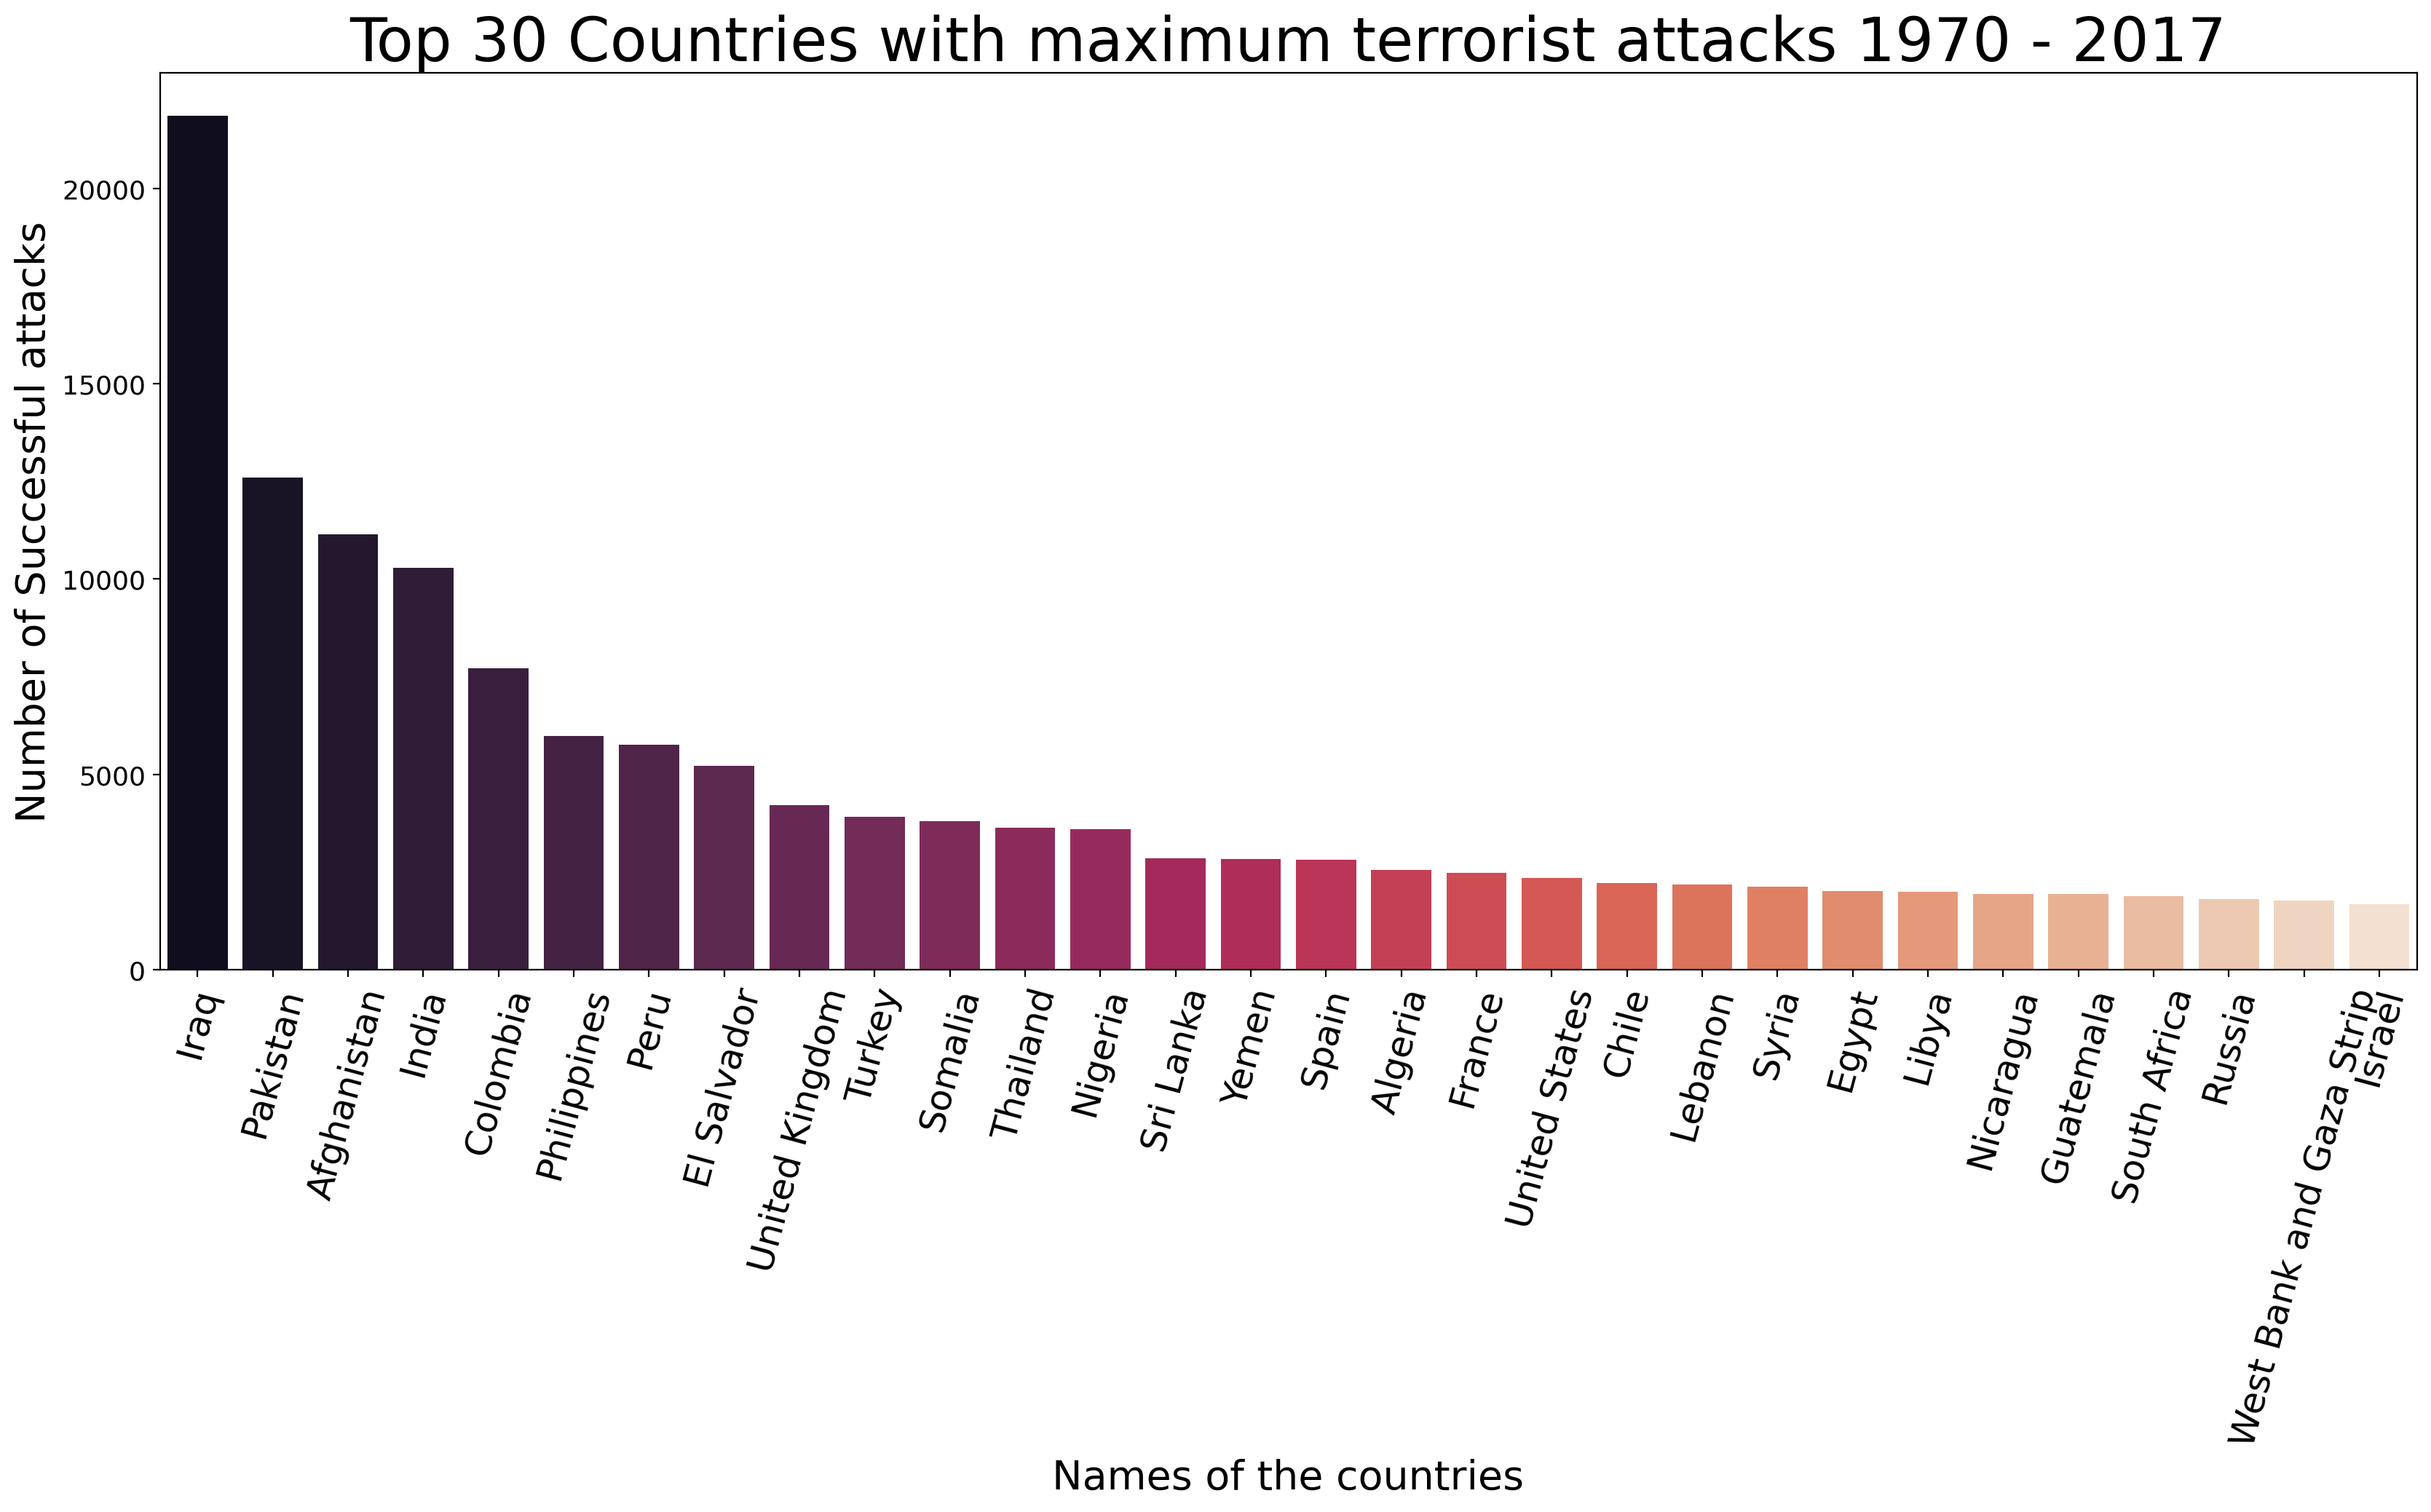

In [24]:
# Chart - 1 visualization code 
plt.figure(figsize = (20,8),dpi = 200)

a = sns.barplot(data = tot_attack, x = 'Country', y = 'Success', palette = 'rocket')

plt.xticks(rotation=75)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=13)

a.set_title('Top 30 Countries with maximum terrorist attacks 1970 - 2017', fontsize = 30)
a.set_ylabel('Number of Successful attacks', fontsize = 20)
a.set_xlabel('Names of the countries', fontsize = 20)
plt.show()

In [25]:
count4 = tot_attack.head(6).reset_index().drop('index', axis = 1)
count4.index+=1
count4

,Country,Success
1,Iraq,21861
2,Pakistan,12600
3,Afghanistan,11141
4,India,10280
5,Colombia,7712
6,Philippines,5975


##### 1. Why did you pick the specific chart?

The statistics of the Bar plot provides us with a quick and easy representation of the overall Terrorist attacks carried out by all Terror outfits combined during the time period from 1970 to 2017.

##### 2. What is/are the insight(s) found from the chart?

Based on the plot above some of the statistics that can be determined include -

1. **Iraq** with 21861 attacks, **Pakistan** with 12600 attacks & **Afghanistan** with 11141 attacks respectively, are the top three contries affected by most number of terrorist attacks globally.

2. **India** closely follows with 10280 attacks at the fourth spot for the most number of terrorist attacks globally.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the above outline insight we can understand the magnitude of attacks worldwide, and provide a more detailed Exploratory Data Analysis on the countries that are a hotspot for Terror activities.

---

## **Chart - 2 Casualty Analysis**

###**2.1 Demography Analysis Of Casualities(Killed) By Geographical Perspective.**

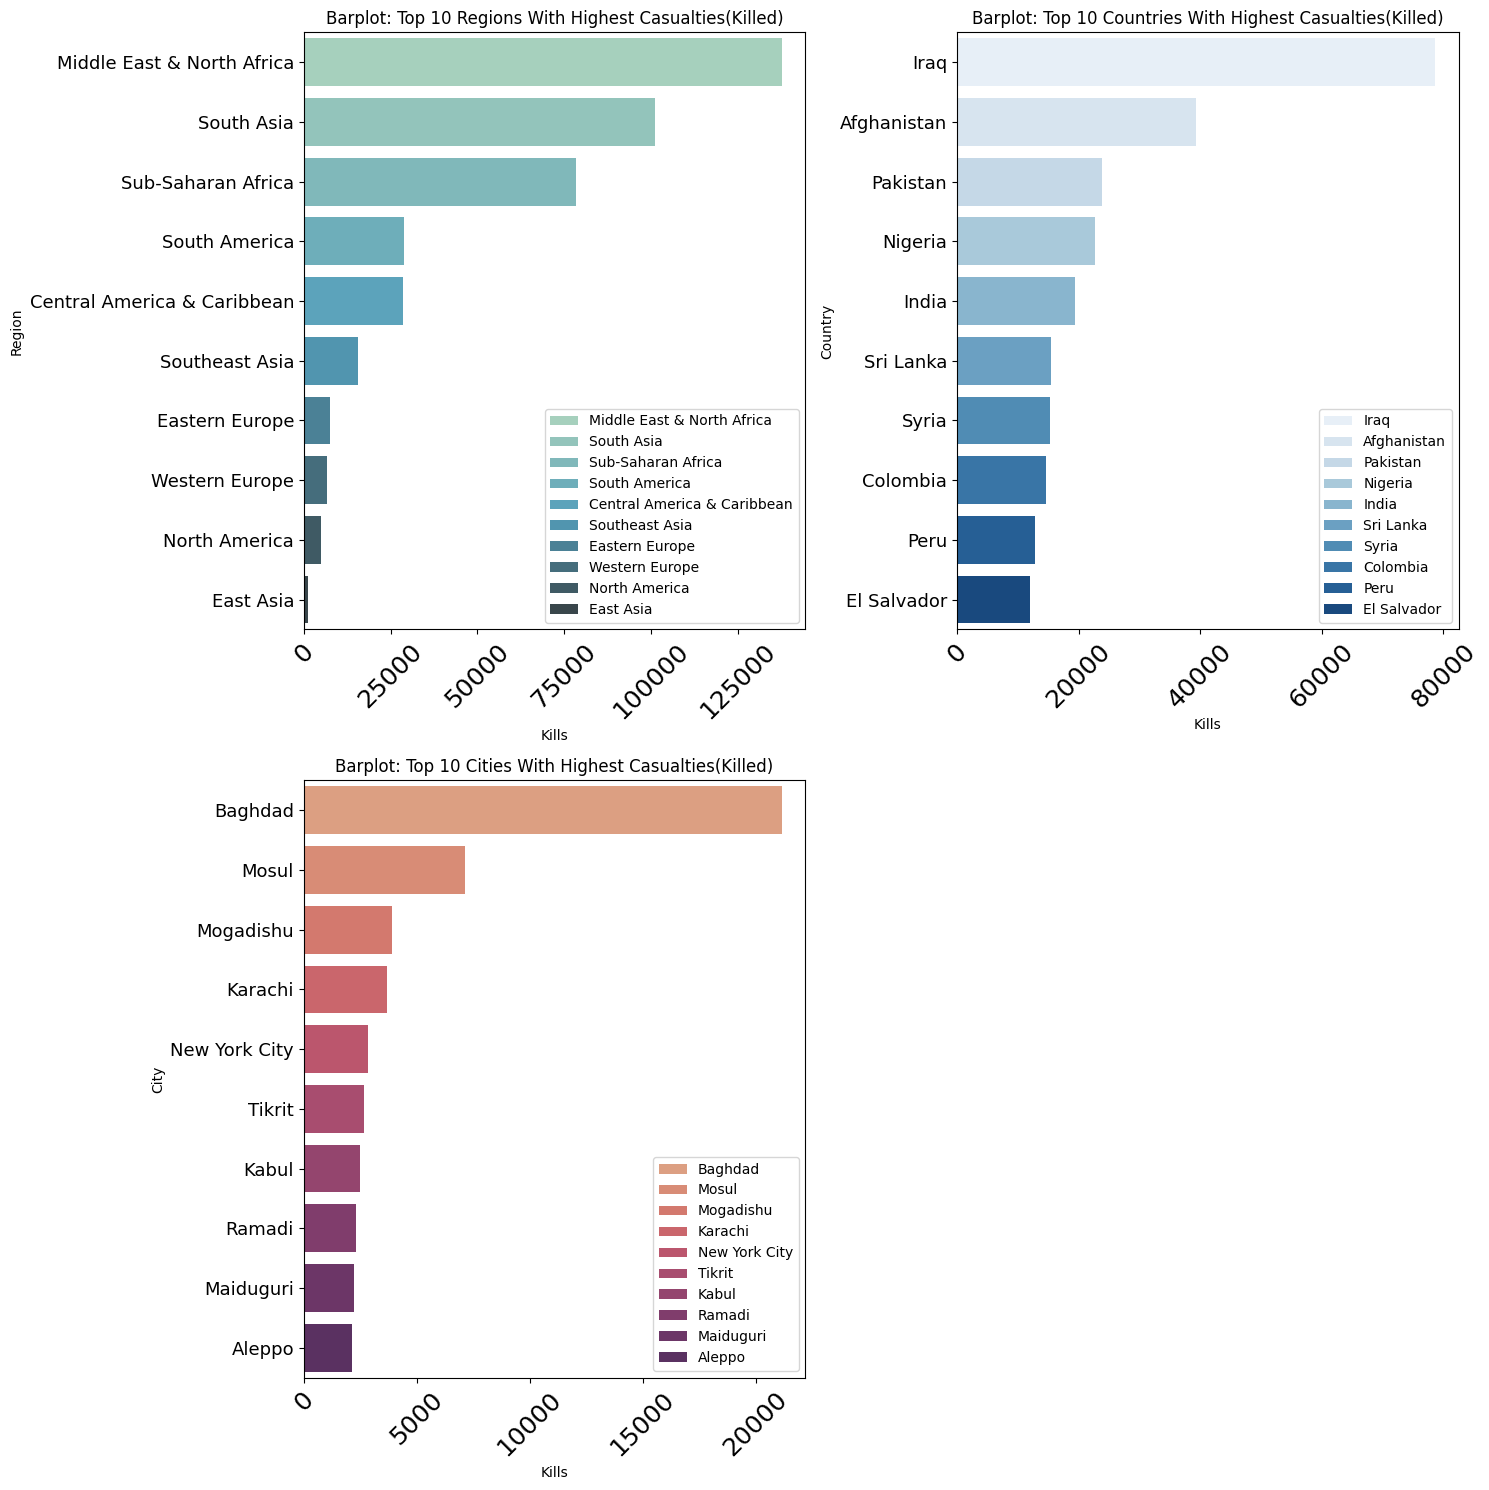

In [26]:
# Chart - 2 visualization code
# Prepare dataframes
top_countries = gt_df.groupby('Country')['Kills'].sum().nlargest(10)
top_countries = top_countries.drop('Unknown', errors='ignore')

top_regions = gt_df.groupby('Region')['Kills'].sum().nlargest(10)
top_regions = top_regions.drop('Unknown', errors='ignore')

top_states = gt_df.groupby('State')['Kills'].sum().nlargest(11)
top_states = top_states.drop('Unknown', errors='ignore')

top_cities = gt_df.groupby('City')['Kills'].sum().nlargest(11)
top_cities = top_cities.drop('Unknown', errors='ignore')

# Add margins between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Plot Subplot of Countries and add respective lables and tiltes 
plt.subplot(2,2,1)
sns.barplot(y=top_regions.index, x=top_regions.values, label=top_regions.index, palette = 'GnBu_d', orient = 'h')
plt.xlabel('Kills')
plt.ylabel('Region')
plt.title('Barplot: Top 10 Regions With Highest Casualties(Killed)')
plt.xticks(rotation=45)
plt.legend()


# Plot Subplot of States and add respective lables and tiltes
plt.subplot(2,2,2)
sns.barplot(y=top_countries.index, x=top_countries.values, label=top_countries.index, palette = 'Blues', orient = 'h')
plt.xlabel('Kills')
plt.ylabel('Country')
plt.title('Barplot: Top 10 Countries With Highest Casualties(Killed)')
plt.xticks(rotation = 45)
plt.legend()


# Plot Subplot of Cities and add respective lables and tiltes
plt.subplot(2,2,3)
sns.barplot(y=top_cities.index, x=top_cities.values,label=top_cities.index, palette = 'flare', orient = 'h')
plt.xlabel('Kills')
plt.ylabel('City')
plt.title('Barplot: Top 10 Cities With Highest Casualties(Killed)')
plt.xticks(rotation=45)
plt.legend()

# Set plot size
plt.gcf().set_size_inches(15,15)
plt.tight_layout()

# Display plot
plt.show()

In [27]:
total_kills  = gt_df['Kills'].sum()
print(f'Total no. of kills from year 1972 to 2017 are {int(total_kills)}')

Total no. of kills from year 1972 to 2017 are 411868


##### 1. Why did you pick the specific chart?

From the data we can gather that **total no. of individuals killed** in terrorist attacks form 1972 to 2017 were **411868**.

##### 2. What is/are the insight(s) found from the chart?

For the wider analysis we can observe: 

1) Among the top 10 regions, the **Middle East and North Africa** have the **highest number** with **137642** of casualties to be specific, while **East Asia** has the **fewest** ie **1152**.

2) Among the top 10 countries, **Iqar** has the **most casualties** with **78589** to be specific, while **El Salvador** has the **fewest** ie **12053** only.


3) Among the top 10 cities, **Baghdad** has the **highest number of casualties** with **21151** to be specific, while **Aleppo** has the **lowest** ie **2125**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

---

###**2.2  Demography Analysis Of Casualities By Terrorist Groups.**



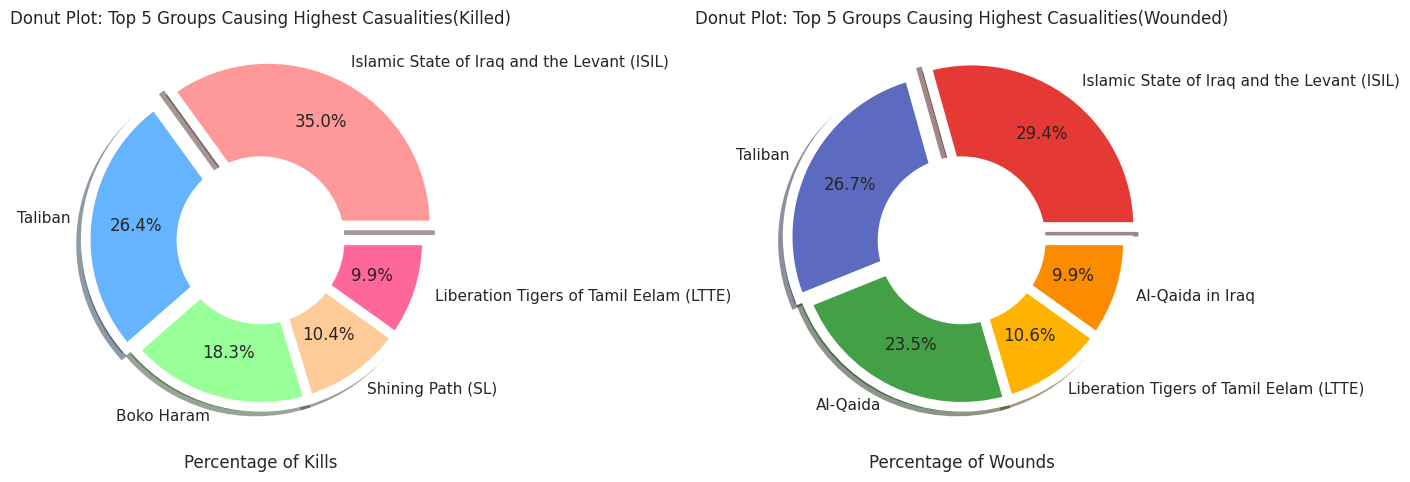

In [31]:
import matplotlib.pyplot as plt

# Prepare dataframe
most_kills = gt_df.groupby('Gang_name')['Kills'].sum().sort_values(ascending=False)
most_kills = most_kills.drop('Unknown')

most_wound = gt_df.groupby('Gang_name')['Wounds'].sum().sort_values(ascending=False)
most_wound = most_wound.drop('Unknown')

# Plot Pieplot for most_kills
plt.figure(figsize=(14, 7))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff6699']
plt.subplot(1, 2, 1)
plt.pie(most_kills.head(), labels=most_kills.head().index, autopct='%1.1f%%', shadow=True, explode=(0.1, 0.05, 0, 0, 0),
        wedgeprops={'linewidth': 7, 'edgecolor': 'white'}, colors=colors, pctdistance=0.7)

my_circle = plt.Circle((0, 0), 0.5, color='white')
plt.gcf().gca().add_artist(my_circle)

# Add title and labels for most_kills plot
plt.title('Donut Plot: Top 5 Groups Causing Highest Casualities(Killed)')
plt.xlabel('Percentage of Kills', fontsize=12)

# Plot Pieplot for most_wound
colors_diff = ['#E53935', '#5C6BC0', '#43A047', '#FFB300', '#FB8C00']
plt.subplot(1, 2, 2)
plt.pie(most_wound.head(), labels=most_wound.head().index, autopct='%1.1f%%', shadow=True, explode=(0.1, 0.05, 0, 0, 0),
        wedgeprops={'linewidth': 7, 'edgecolor': 'white'}, colors=colors_diff, pctdistance=0.7)


my_circle = plt.Circle((0, 0), 0.5, color='white')
plt.gcf().gca().add_artist(my_circle)

# Add title and labels for most_wound plot
plt.title('Donut Plot: Top 5 Groups Causing Highest Casualities(Wounded)')
plt.xlabel('Percentage of Wounds', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### **Observation & Inferences:**

The above plot depicts the **percentage the kills and wounded victims** **top 5 Terrorist group**.

1. Among the top 5 terrorist groups **Islamic States of Iraq and the Levant(ISIL)** caused the **most** **casualties** of **35.0 percentage** 

2. Among the top 5 terrorist groups **Islamic State of Iraq the Levant(ISIL)** caused the **least** casualties of **9.9 percentage**.

3. Among te top 5 terrorist group **Islamic State of Iraq and the Levant** caused most **injured individual** of **29.5 percentage**.

4. Among the top 5 terrorist groups **Al-Qaida in Iraq** caused the **least** caused most **injured individual** of **9.9 percentage**.


---


## **Chart - 3 Attack Types/Methods Analysis**

### **3.1 Exploring the different types of attacks used by terrorists**

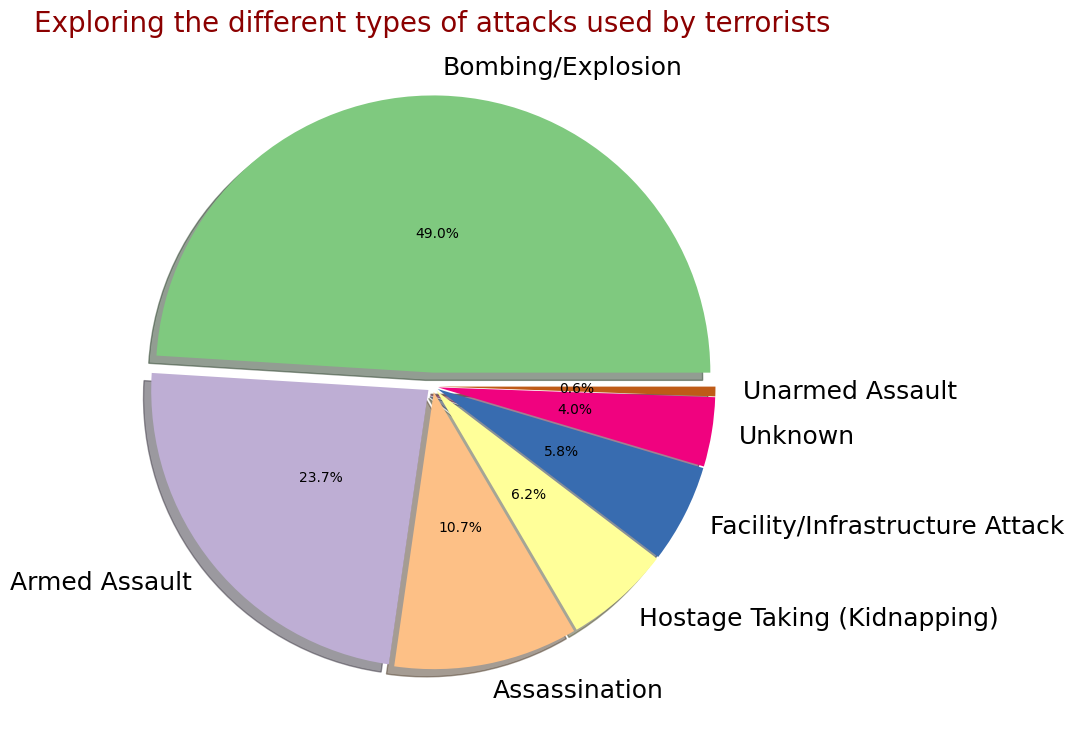

In [28]:
# Chart - 3 visualization code
# Creating the figure size
plt.figure(figsize=(13,9))

# Choosing a color palette
colors = sns.color_palette('Accent')

# Giving separtion among all different pie-pieces
explode_list = [0.05, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

# Creating dataframe of attack types
df = gt_df['Attacktype'].value_counts().head(7)

# Plotting a pie chart 
plt.pie(df, labels=df.index, autopct='%1.1f%%',explode=explode_list, pctdistance=.5, colors=colors, shadow=True)

# Giving a proper title & showing the plot
plt.title("Exploring the different types of attacks used by terrorists",fontsize=20,color='Darkred')
plt.show()

##### 1. Why did you pick the specific chart?

By this chart, we can explore the different types of attacks used by Terrorists & how they spread the terror by employing different attack methods like explosion, armed assault, assassination or hijacking.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above pie chart that the terrorists used bombing or explosions as their favourite type of attack. Nearly 50% (48.6) attacks are made by using explosions. This is followed by Armed Assault (23.5%) & Assassination (10.6%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helped us to know about the favourite types of attacks choosen by Terrorists.

---

### **3.2 How different type of attacks affected the victims of terrorism as per their Nationality**

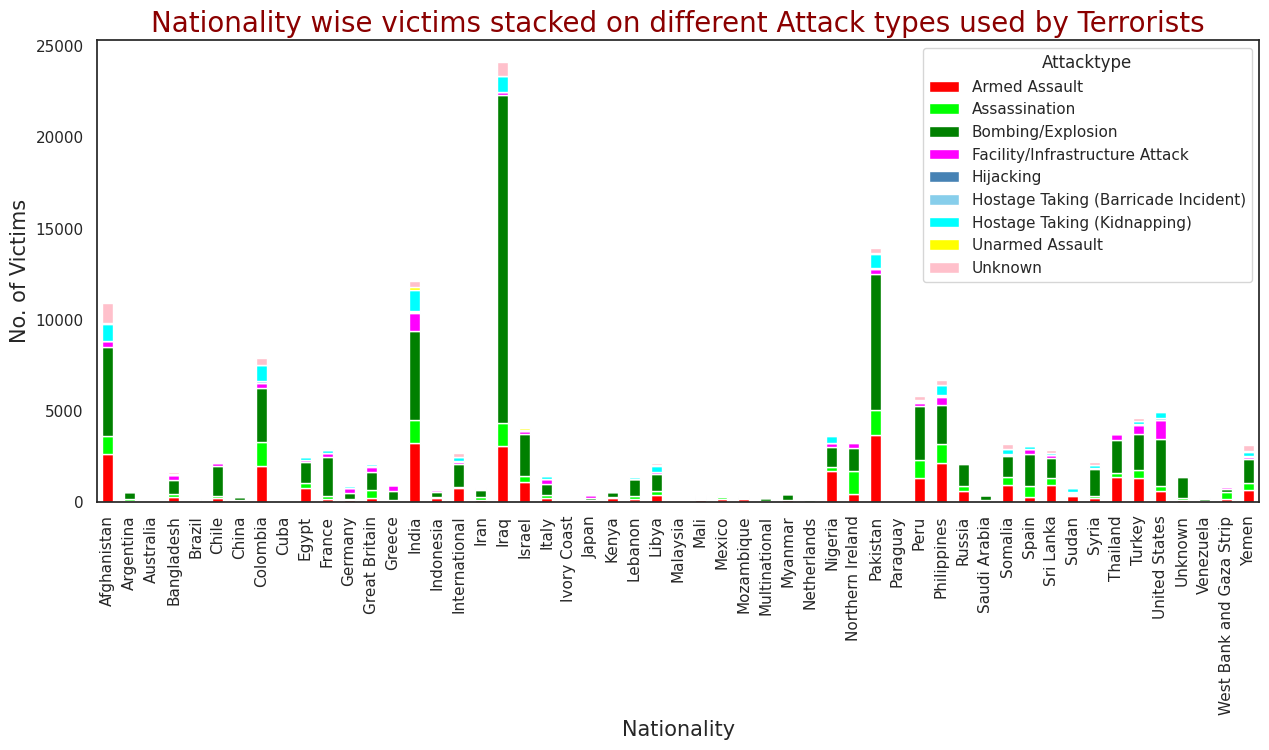

In [29]:
#Creating a dataframe with the different type of attacks affected the victims of terrorism as per their Nationality
nation_df = gt_df.groupby(['Nationality', 'Attacktype'])['victims'].count().unstack('Attacktype').dropna()

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
ax = nation_df.plot(kind='bar', stacked=True, color=['red', 'lime', 'green', 'fuchsia', 'steelblue','skyblue', 'aqua', 'yellow', 'pink'])

#rotate x-axis labels
plt.xticks(rotation=90)

#add axis titles
plt.ylabel('No. of Victims',fontsize= 15)
plt.xlabel("Nationality",fontsize= 15)

#add overall title
plt.title("Nationality wise victims stacked on different Attack types used by Terrorists",fontsize= 20,color='Darkred')

# Set plot size
plt.gcf().set_size_inches(15,6)

#Display the plot
plt.show()

### **Observations & Inferences :**

Here we dig more deeper into the victims of terrorism as per their Nationality & different Attack Types used by terrorists. In short which attack killed most number of citizens as per their nationality.

This is an elaborative analysis of Attack types as per victim's Nationality. From the previous pie chart of attack types we already know that the Bombing/Explosion is most favourable method of attack used by terrorists. This stacked bar helps us to identify following points--

1. Iraqi people are most affected by terrorism & the amount of Bombing or Explosion is maximum in Iraq than any other country in the world.

2. Pakistani people are also affected by Bombing but the maximum amount of Armed Assault is also prevalent in Pakistan.

3. Indians have seen Bombing & Armed Assault as well but the Facility/Infrastructure Attack in India is nearly same as USA. Maximum number of Indians & Americans are also Kidnapped Or Taken as Hostages.


---

## **Chart - 4 TERROR TREND ANALYSIS** 

### **4.1 Overall terror trend lineplot**

In [32]:
#Code - 
year_grp = gt_df.groupby('Year')
count_year = pd.DataFrame(year_grp['Success'].sum()).reset_index()
failed = gt_df[gt_df['Success'] == 0]
failed_df = pd.DataFrame(failed['Year'].value_counts().reset_index())
failed_df.columns = ['Year','Failures']
failed_df.sort_values(by = 'Year', ascending = True, inplace = True)

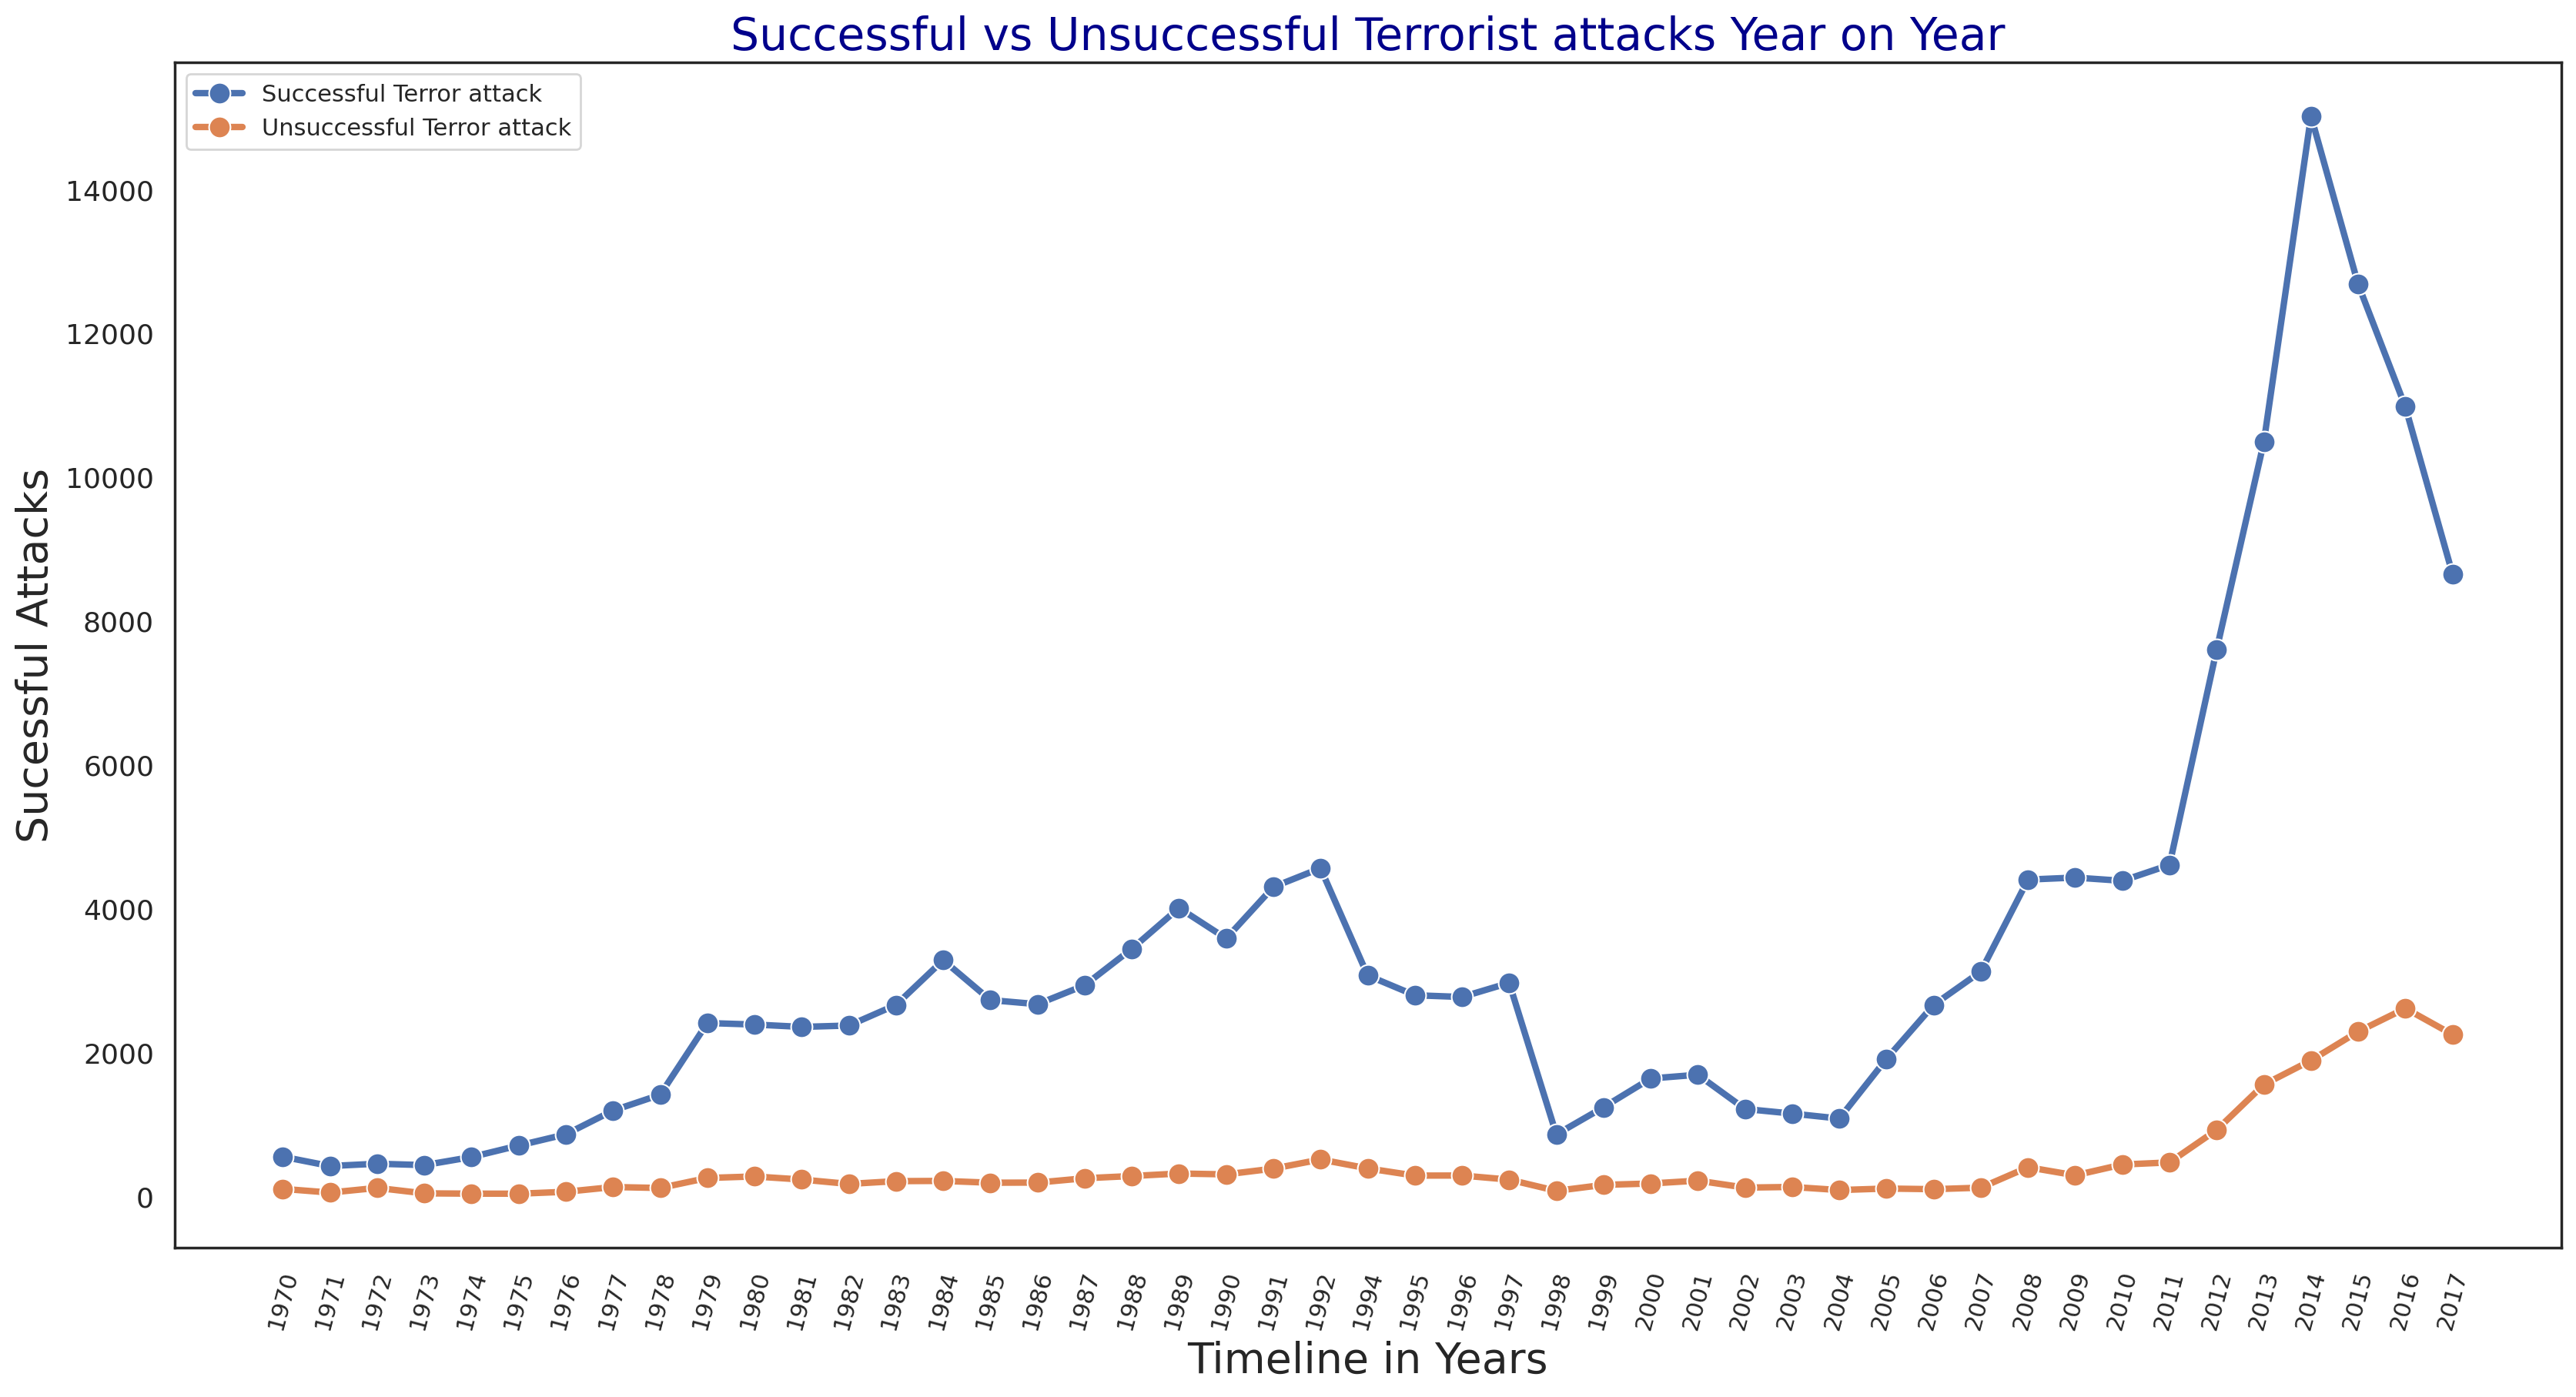

In [33]:
# Chart - 4 visualization code
# Line plot representing the Year Vs no of Attacks Regional wise
plt.figure(figsize = (20,10),dpi = 200)
sns.lineplot(data = count_year, x = count_year['Year'].astype(str),
             y = count_year['Success'], linewidth = 3,label = 'Successful Terror attack', 
             marker = 'o',markersize = 10)
sns.lineplot(data = failed_df , x = failed_df['Year'].astype(str), y = failed_df['Failures'],
             linewidth = 3, label = 'Unsuccessful Terror attack', marker = 'o',markersize = 10)
plt.ylabel('Sucessful Attacks',fontsize= 20)
plt.xlabel("Timeline in Years",fontsize= 20)
plt.xticks(rotation = 75)
plt.yticks(fontsize = 13)
plt.title("Successful vs Unsuccessful Terrorist attacks Year on Year",fontsize=21,color='Darkblue')

plt.show()

##### 1. Why did you pick the specific chart?

The above plot indicates a more detailed apprach with a lineplot that indicates the progression of time along the 'X' axis and signifies the count of number of attacks along the 'Y' axis.

##### 2. What is/are the insight(s) found from the chart?

The blue plot line indicates number of successful attacks and the orange line indicates the number of unsuccessful attacks.

The following inference can be obtained from the above plot - 
1. From the plot above it can be understood there were two significant time periods where a tremendous **increase/spike** in terrorist attacks which were recorded, they were in the years **1992 and 2014**.

2. The least terrorist attacks were observed in the years **1973, 1998 and 2004**.

3. The highest number of unsuccessful attacks were recorded in the year **2016** with about 2300 attacks, However this information does not indicate an increase in success ratio of any intelligence/military agencies.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Chart - 5 Target Analysis**

### **5.1 Target types chosen by Terrorists**

In [34]:
# Percentage of Target type in overall targets
(gt_df['Target_type'].value_counts().head(10)/gt_df.shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_type, dtype: float64

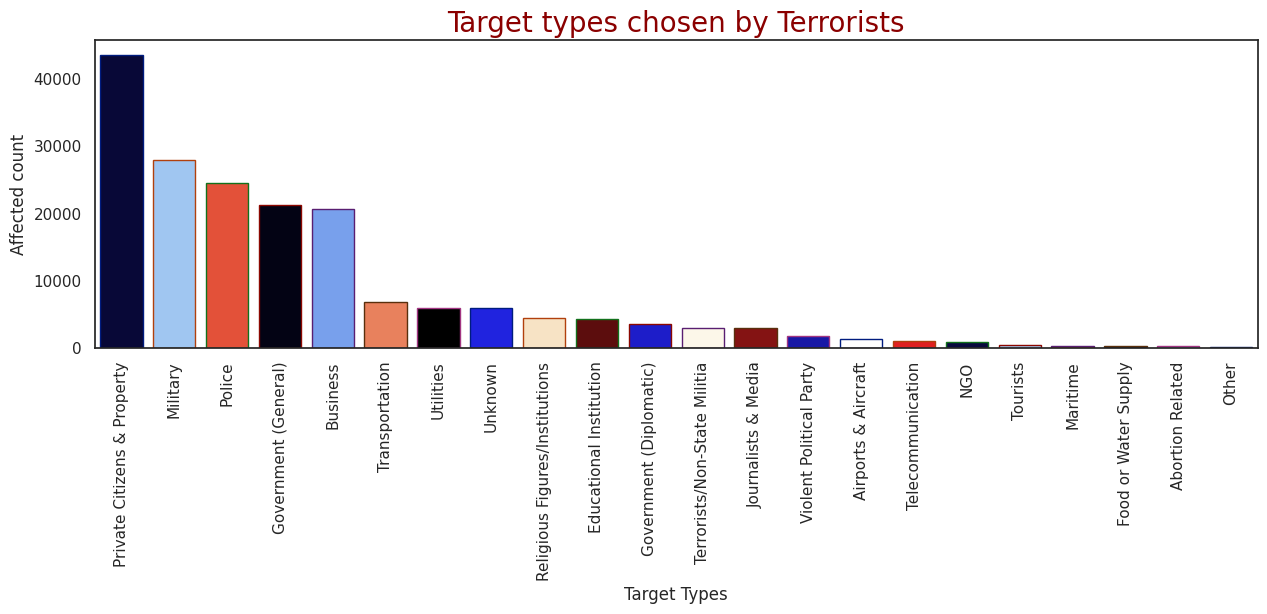

In [35]:
# Chart - 5 visualization code
# Creating the subplot & figure size.
plt.subplots(figsize=(15,4))

# Creating a countplot of target types chosen by Terrorists.
sns.countplot(x='Target_type',data=gt_df ,palette='flag',order=gt_df.Target_type.value_counts().index,edgecolor=sns.color_palette('dark',7))

# Giving a proper title, axis labels.
plt.title('Target types chosen by Terrorists',fontsize=20,color='Darkred')
plt.xlabel('Target Types')
plt.ylabel('Affected count')

# Rotating x-axis values for better visualisation
plt.xticks(rotation=90)

# Showing the plot
plt.show()

##### 1. Why did you pick the specific chart?

By this chart we can explore the different types of targets which were chosen by terrorist to spread their terror activities. We will see the most favourite targets of terrorists.

##### 2. What is/are the insight(s) found from the chart?

The state of terrorist attacks is critical after 2010. The top five targets of terrorist attacks are citizens, the military, the police, governments, and businesses.

1. The most attacked target is 'Private Citizens & Property' which is approximately 25%.

2. Military, Police, Government and Business are of 10-20% attacked Targets

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

So, we can say that civilians were the targets most at risk, and their risk index was considerably higher than that of other targets.

---

### **2.2 Target Type Analysis on different regions**

Here we dig more deeper into the target type analysis based on different regions of the World. By this way we can explore & compare which establishments of the world is most affected as per region. 

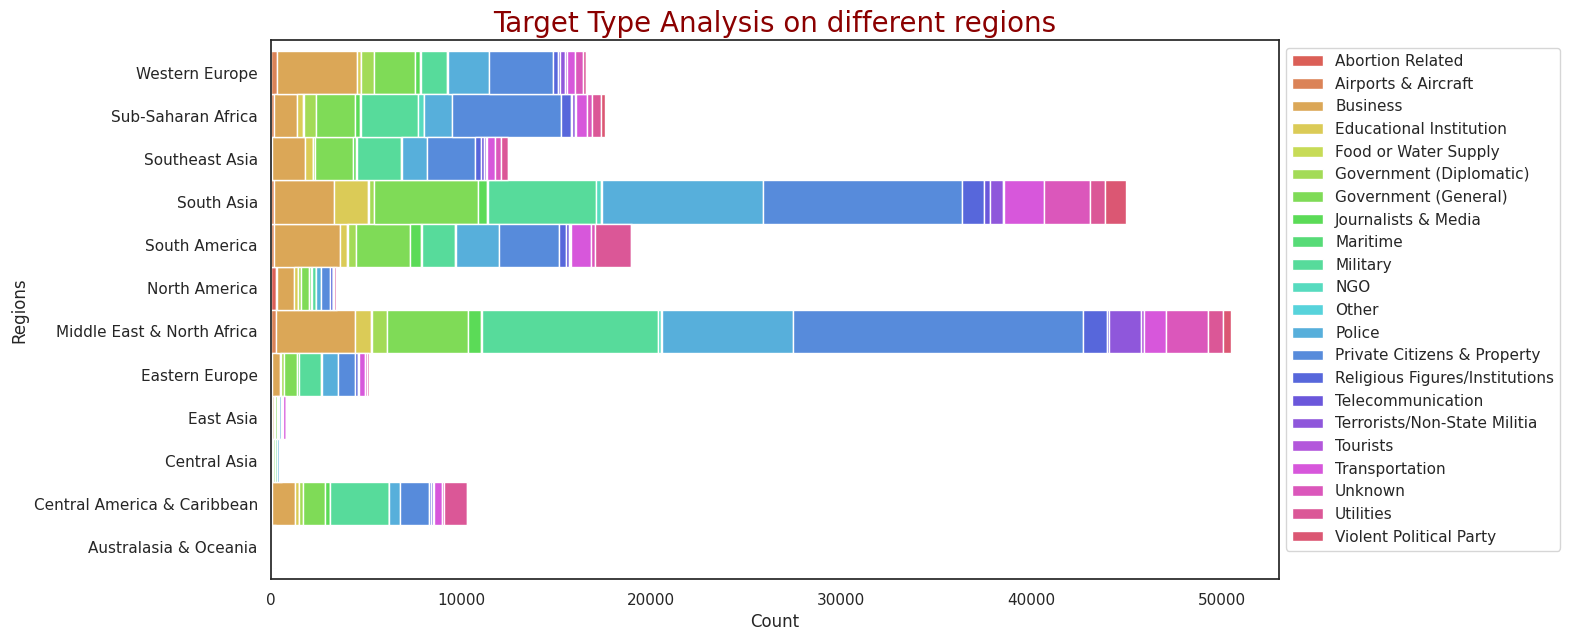

In [36]:
# Plotting a crosstab analysis of Target types on different regions
pd.crosstab(gt_df.Region,gt_df.Target_type).plot.barh(stacked=True,width=1,color=sns.color_palette('hls',22))

# Setting plot size
plt.gcf().set_size_inches(13,7)

# Adding axis & overall titles and adjusting legend location
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Target Type Analysis on different regions',fontsize=20,color='Darkred')
plt.xlabel('Count')
plt.ylabel('Regions')

# Showing the plot
plt.show()

### **Observations & Inferences :**

1. Middle East & North Africa is most affected region followed by South Asia.

2. In Middle East & North Africa, Private Citizens & Properties are favourite target followed by Millitary, Police, Government & Businesses. But in comparison with South Asia, here, the attacks on Private & Millitary are more in numbers.

3. In South Asia also Private Citizen & Properties are favourite targets followed by Police, Millitary, Government & Businesses. But here, the Police & Government attacks are more in number than Middle East & North Africa.

4. The targets of South America, Sub-Saharan Africa & Western Europe is nearly similar in nature. South America have the most Violent Political Parties all over in the world.

5. In Western Europe & Middle East-North Africa, nearly equal number of Businesses attacked, which is maximum in the world.


---

## **Chart - 6  Weaponry Analysis.**

###**Analyis Of Most Common Weapons In Terrorist Attacks.**

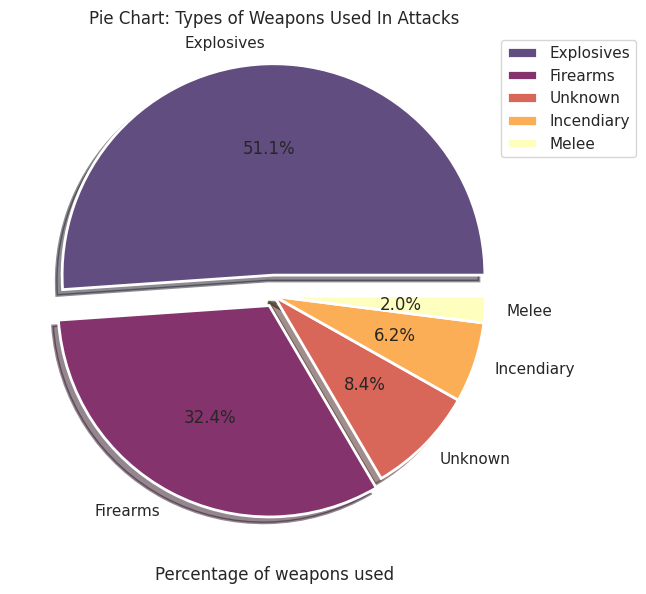

In [37]:
# Chart - 6 visualization code
# Prepare DataFrame
wp_df = gt_df['Weapontype'].value_counts().sort_values(ascending=False)

# Create the subplots
plt.figure(figsize=(15, 7))

# Pie Chart
plt.subplot(1, 2, 1)
colors = [(0.382256, 0.300007, 0.499417),
          (0.520837, 0.199549, 0.428426),
          (0.848737, 0.405403, 0.348773),
          (0.98752, 0.683399, 0.335631),
          (0.997079, 0.998023, 0.746482)]
 
plt.pie(wp_df.head(), labels=wp_df.head().index, autopct='%1.1f%%', colors=colors,
        explode = (0.1,0.05,0,0,0), shadow = True,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Pie Chart: Types of Weapons Used In Attacks')
plt.xlabel('Percentage of weapons used')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Display plot
plt.show()

In [38]:
print(wp_df.head())

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapontype, dtype: int64


##### 1. Why did you pick the specific chart?

The above plot depicts the **percentage of  top 5 different type of weapons** used in terrorist attack since year 1972 to 2017.

##### 2. What is/are the insight(s) found from the chart?

1) Fron the above plot we can observe the most used weapons used for terrorist attacks is **Explosive**, **Firearms** by **51.1 percent** and **32.4 percentage respectively**.

2) Where as we can also observe **Incendiary(fire)** and **Melee(sword)** were least used amongst all the weapons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Chart - 7 Analysis of terror attacks in INDIA**

In [41]:
#Creating a dataframe with the dataset of India only
gt_india = gt_df[gt_df['Country'] == 'India']

#Dataframe of Top 10 states in India which were attacked by Terrorists:
indiastate_df = gt_india.groupby("State")['Kills'].count().sort_values(ascending=False).reset_index().head(10)

#Dataframe of Top 10 Cities in India which were attacked by Terrorists:
indiacity_df = gt_india.groupby("City")['Kills'].count().sort_values(ascending=False).reset_index().head(10)
city_df=indiacity_df.drop(axis=0, index=1)

#Dataframe of Top 10 Terrorist groups who killed most citizens
group_df = gt_india.groupby("Gang_name")['Kills'].count().sort_values(ascending=False).reset_index().head(10)
gr_df=group_df.drop(axis=0, index=0)

#Dataframe of Top 10 most attacked Targets in India
attack_df = gt_india.groupby("Attacktype")['Kills'].count().sort_values(ascending=False).reset_index().head(10)

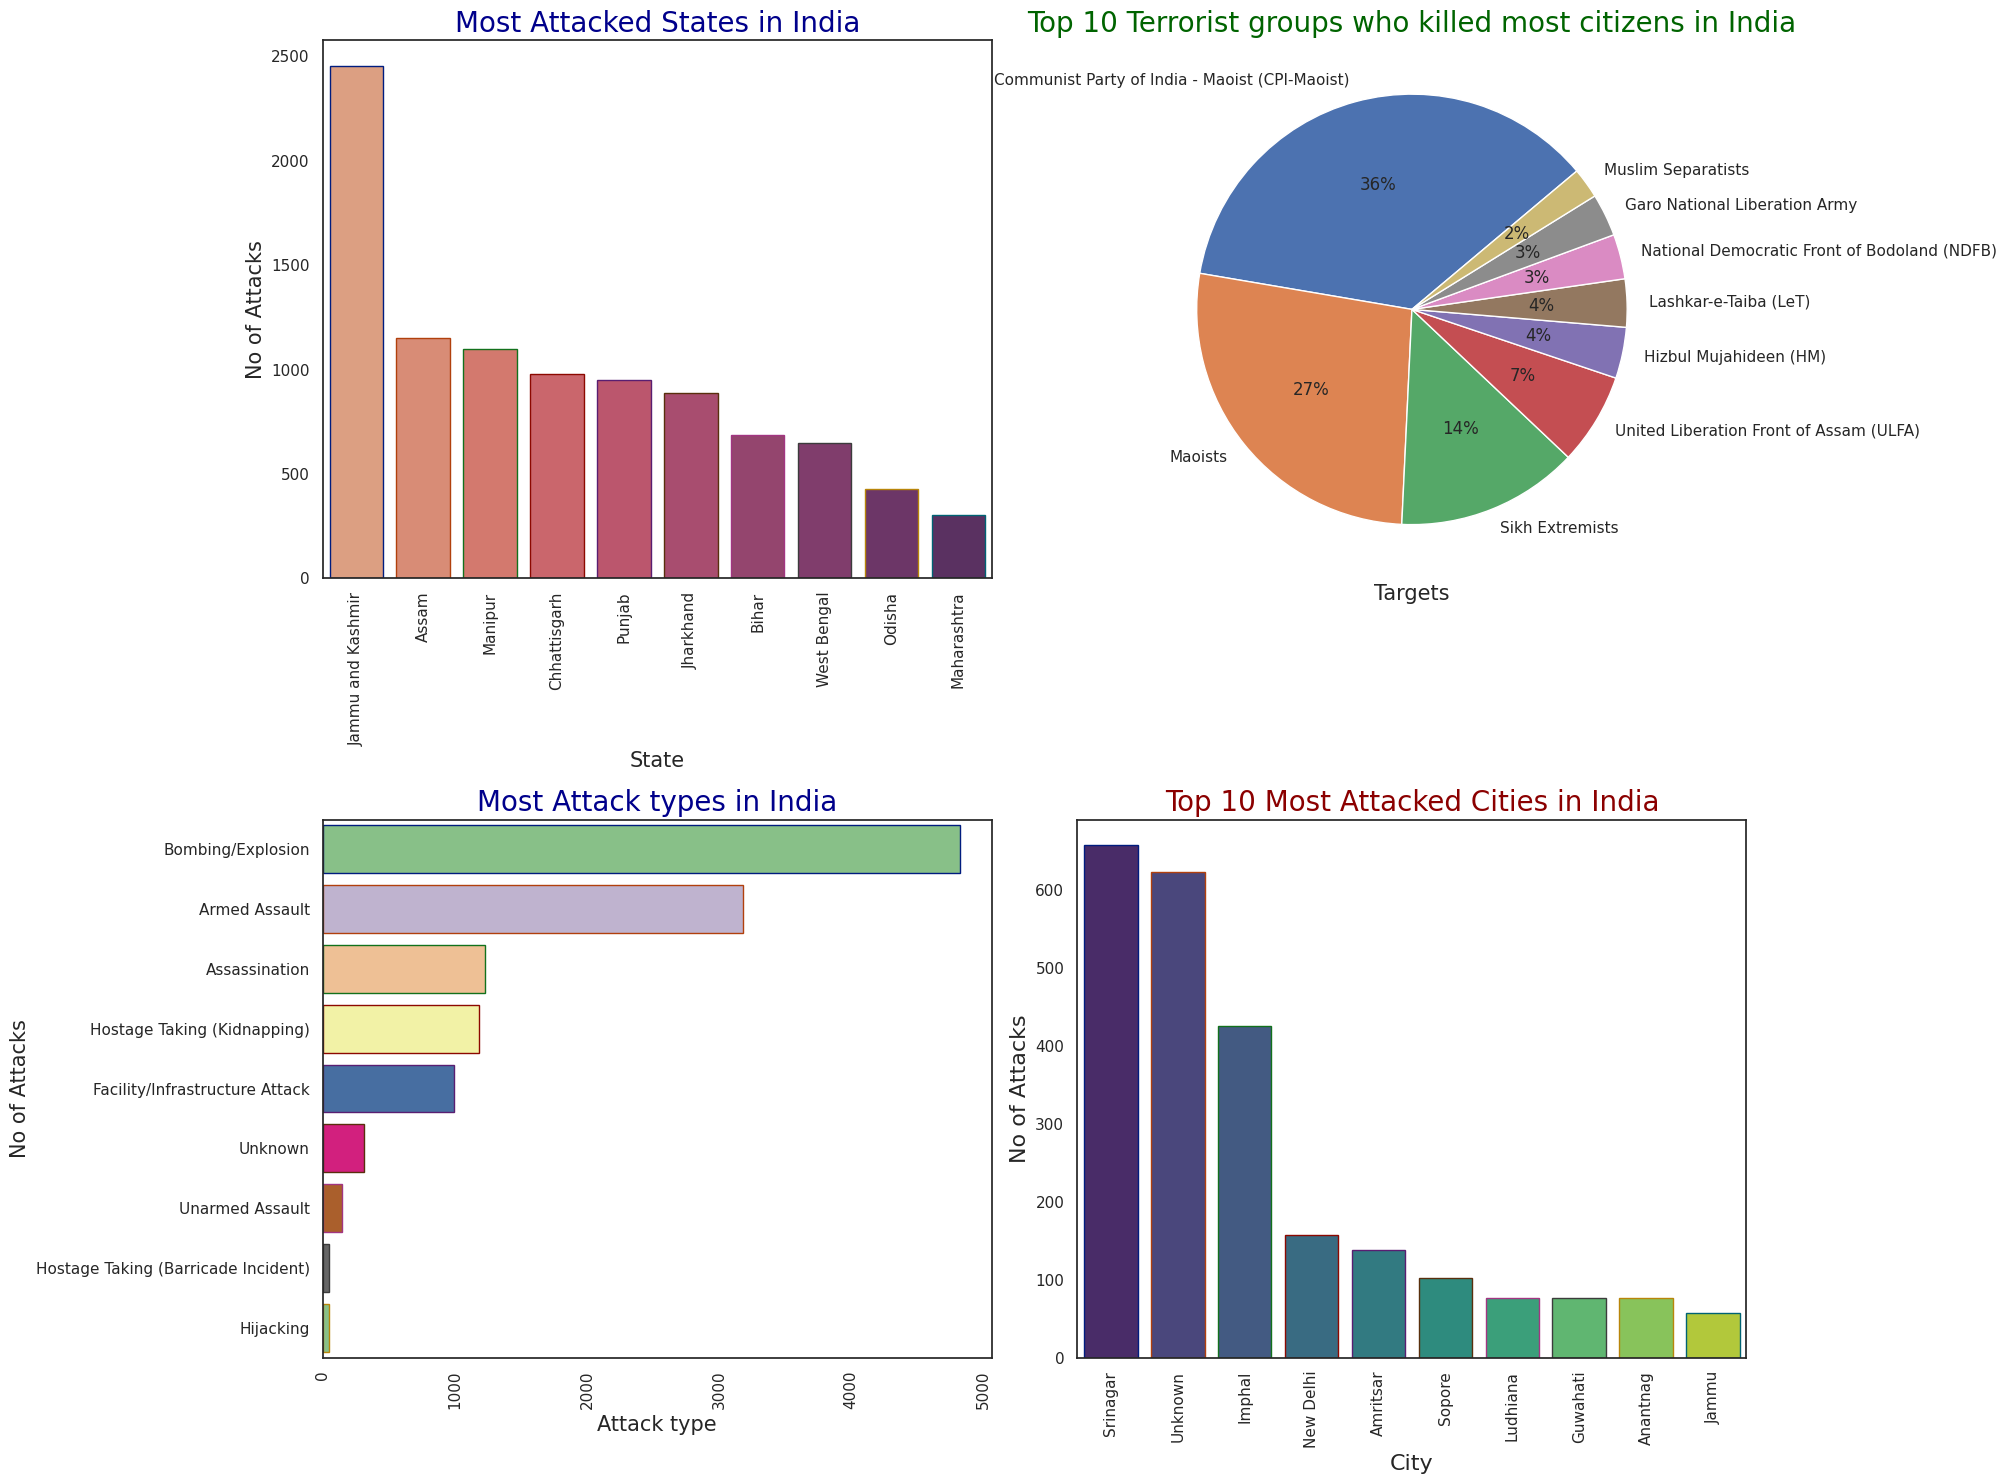

In [42]:
# Top 10 states in India which were attacked by Terrorists:
plt.subplot(2,2,1)
sns.barplot(x=indiastate_df['State'], y=indiastate_df['Kills'],  palette='flare',edgecolor=sns.color_palette('dark',10),orient='v')
plt.title("Most Attacked States in India",fontsize= 20,color='Darkblue')
plt.xlabel('State',fontsize=15)
plt.ylabel('No of Attacks',fontsize = 15)
plt.xticks(rotation=90)


# Top 10 Terrorist groups who killed most citizens:
plt.subplot(2,2,2)
xlabels = gr_df['Gang_name']
ylabels= gr_df['Kills']
plt.pie(ylabels,labels=xlabels,autopct='%.0f%%',startangle=40)
plt.title("Top 10 Terrorist groups who killed most citizens in India",fontsize=20,color='Darkgreen')
plt.xlabel("Targets",fontsize=15)


#Top 10 most attacked Targets in India
plt.subplot(2,2,3)
sns.barplot(x=attack_df['Kills'], y=attack_df['Attacktype'],  palette='Accent',edgecolor=sns.color_palette('dark',10),orient='h')
plt.title("Most Attack types in India",fontsize=20,color='Darkblue')
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("No of Attacks",fontsize=15)
plt.xticks(rotation=90)


# Top 10 Cities in India which were attacked by Terrorists:
plt.subplot(2,2,4)
sns.barplot(x=indiacity_df['City'], y=indiacity_df['Kills'],  palette='viridis',edgecolor=sns.color_palette('dark',10),orient='v')
plt.title("Top 10 Most Attacked Cities in India",fontsize= 20,color='Darkred')
plt.xlabel('City',fontsize=16)
plt.ylabel('No of Attacks',fontsize = 16)
plt.xticks(rotation=90)

# Set plot size
plt.gcf().set_size_inches(20,15)
plt.tight_layout()

# Display plot
plt.show()

##### 1. Why did you pick the specific chart?

By this analysis, we can explore different visualizations of terror attacks in India, like: most affected states, cities & we will also see which terror groups are most prevalent in India.

##### 2. What is/are the insight(s) found from the chart?

1. 'Jammu and Kashmir' is the State with most Terror attacks in India succeeded by 'Assam' & 'Manipur'.

2. Most dangerous terrorist group in India is Communist Party of India-Maoists(CPI-M) followed by Maoists, Sikh_Extremists & ULFA.

3. The terrorists used bombs or explosions as their favourite type of attack succeeded by Armed Assault.

4. 'Srinagar' is the city with most attacks in India followed by 'Imphal' & 'New Delhi'.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

---

## **Chart - 8 Analysis of Year wise Terror attacks stacked on weapons used in India**

In [43]:
#Dataframe of Year wise Terror attacks in India
year_df = gt_india.groupby(['Year','Weapontype'])['Kills'].count().unstack('Weapontype').fillna(0)

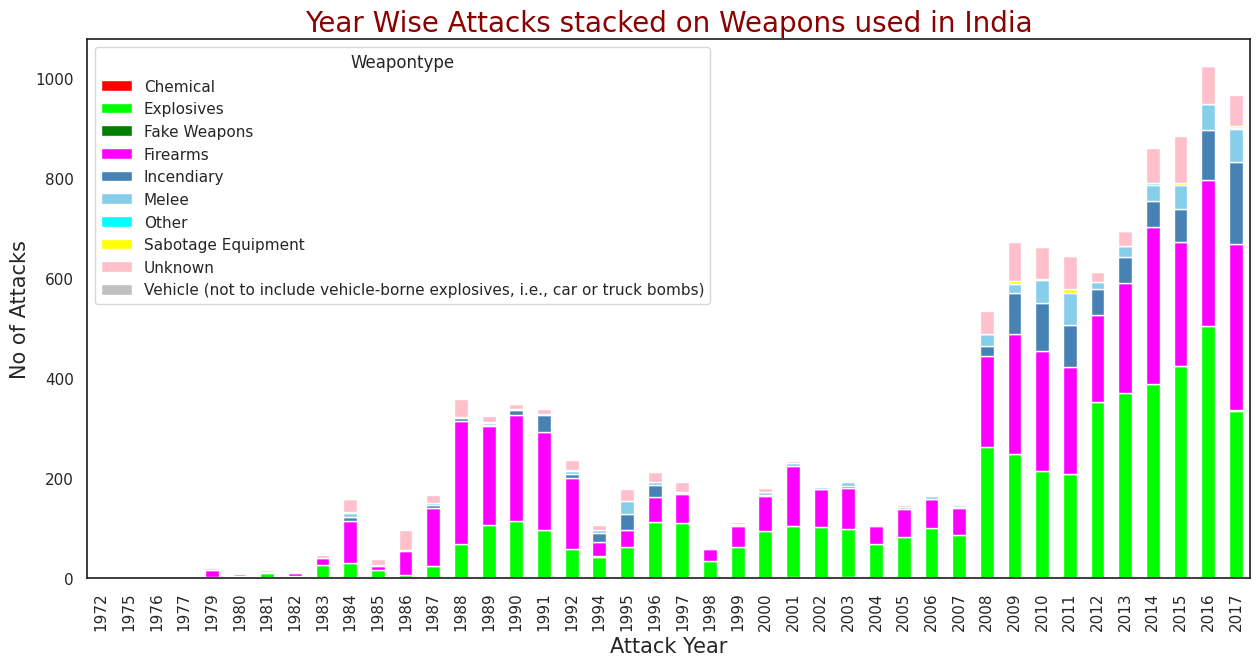

In [44]:
# Chart - 8 visualization code
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
ax = year_df.plot(kind='bar', stacked=True, color=['red', 'lime', 'green', 'fuchsia', 'steelblue','skyblue', 'aqua', 'yellow', 'pink', 'silver'])

#rotate x-axis labels
plt.xticks(rotation=90)

#add axis titles
plt.ylabel('No of Attacks',fontsize= 15)
plt.xlabel("Attack Year",fontsize= 15)

#add overall title
plt.title("Year Wise Attacks stacked on Weapons used in India",fontsize= 20,color='Darkred')

# Set plot size
plt.gcf().set_size_inches(15,7)

#Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

By this chart, we can easily get insights about the types of weapons used to make a terrorist attack over the years in India 

##### 2. What is/are the insight(s) found from the chart?

1. In 2016, India has suffered the maximum number of Terrorist attacks.

2. There was low terrorist activities till 1977.

3. A certain spike in terror activities has been seen after the year of 2007.

4. Terrorists used Explosives & Fire Arms mostly to create these attacks.

5. We can also conclude from the stacked bargraph, that the use of Explosives instead of Firearms is increased after 1992.

6. The use of Incendiaries ((of a device or attack) designed to cause fires ) is increased sharply in 2017.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

---

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***